In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [10]:
import numpy as np
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt


In [11]:
import os
import cv2

def load_images_and_labels(data_path):
    """
    Loads images and labels from a given dataset folder.
    """
    splits = ['train', 'valid', 'test']
    datasets = {}
    
    for split in splits:
        image_folder = os.path.join(data_path, split, "images")
        label_folder = os.path.join(data_path, split, "labels")

        if not os.path.exists(image_folder):
            print(f"Skipping {split}: {image_folder} not found.")
            continue

        datasets[split] = []
        for image_file in os.listdir(image_folder):
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(image_folder, image_file)
                label_file = os.path.splitext(image_file)[0] + ".txt"
                label_path = os.path.join(label_folder, label_file)
                
                # Load image
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Warning: Failed to load image: {image_path}")
                    continue
                
                # Load labels
                labels = []
                if os.path.exists(label_path):
                    with open(label_path, 'r') as f:
                        labels = [line.strip() for line in f.readlines()]
                else:
                    print(f"Warning: Label file not found for {image_file}")

                datasets[split].append((image_path, image, labels))
        
        print(f"Loaded {len(datasets[split])} images for {split} split.")

    return datasets

# Example usage
dataset_path = r"C:\Users\yamun\OneDrive\Desktop\AIML\archive\BoneFractureYolo8"  # Replace with your dataset path
datasets = load_images_and_labels(dataset_path)

# Access train/val/test datasets
train_dataset = datasets.get('train', [])
valid_dataset = datasets.get('valid', [])
test_dataset = datasets.get('test', [])


Loaded 3631 images for train split.
Loaded 348 images for valid split.
Loaded 169 images for test split.


Visualizing Training Dataset:


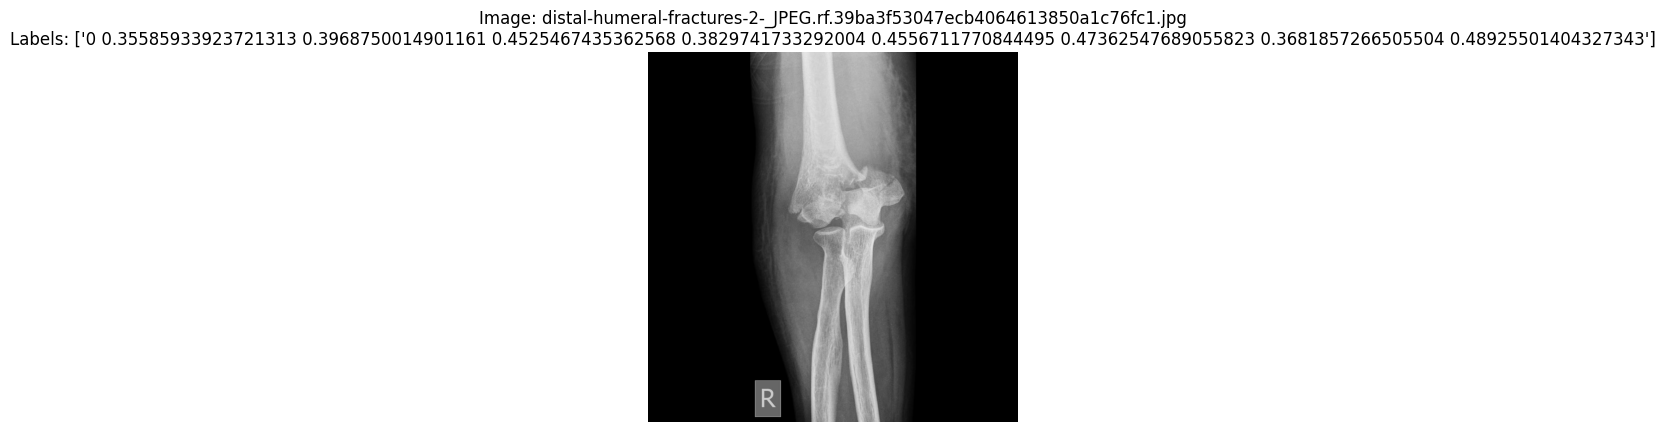

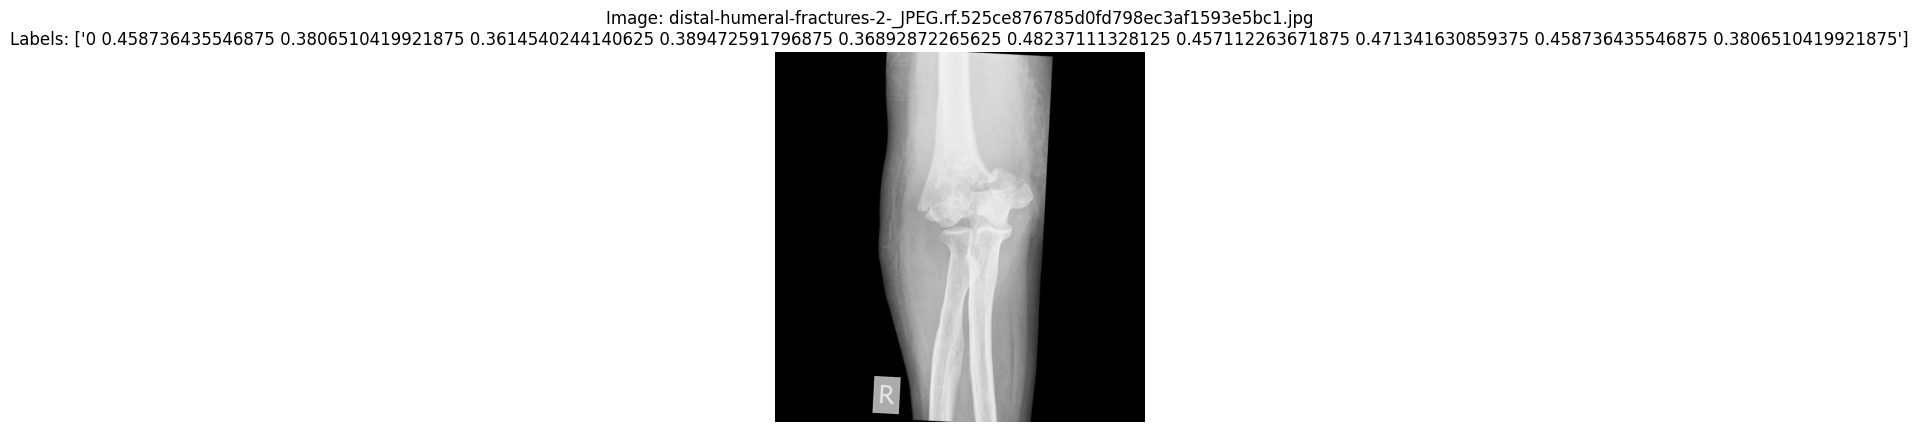

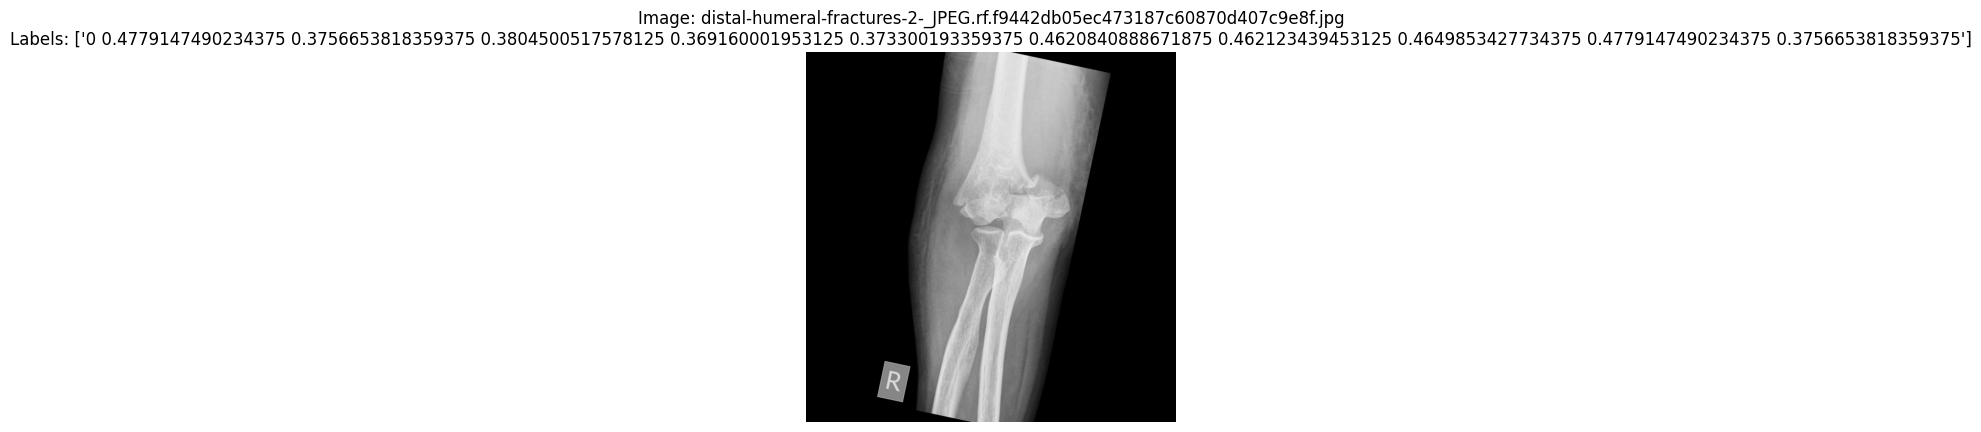

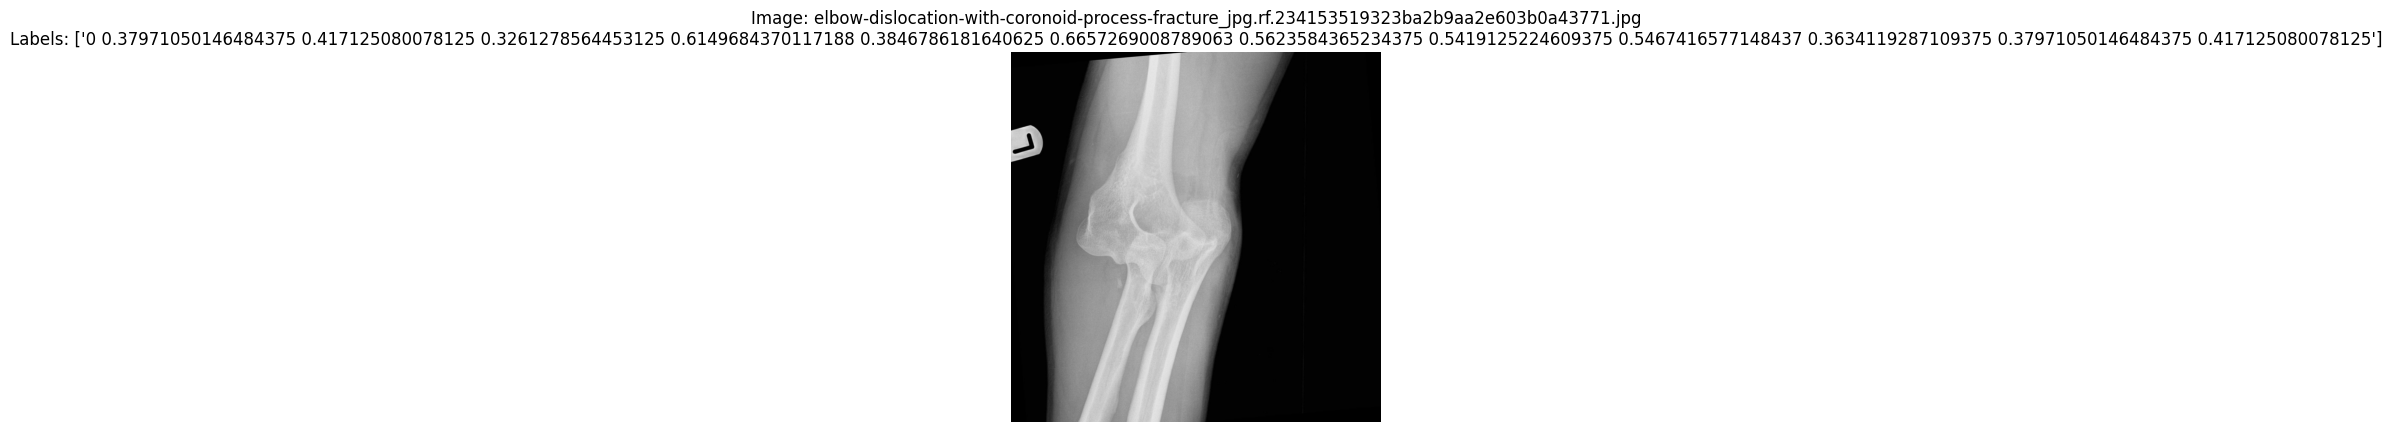

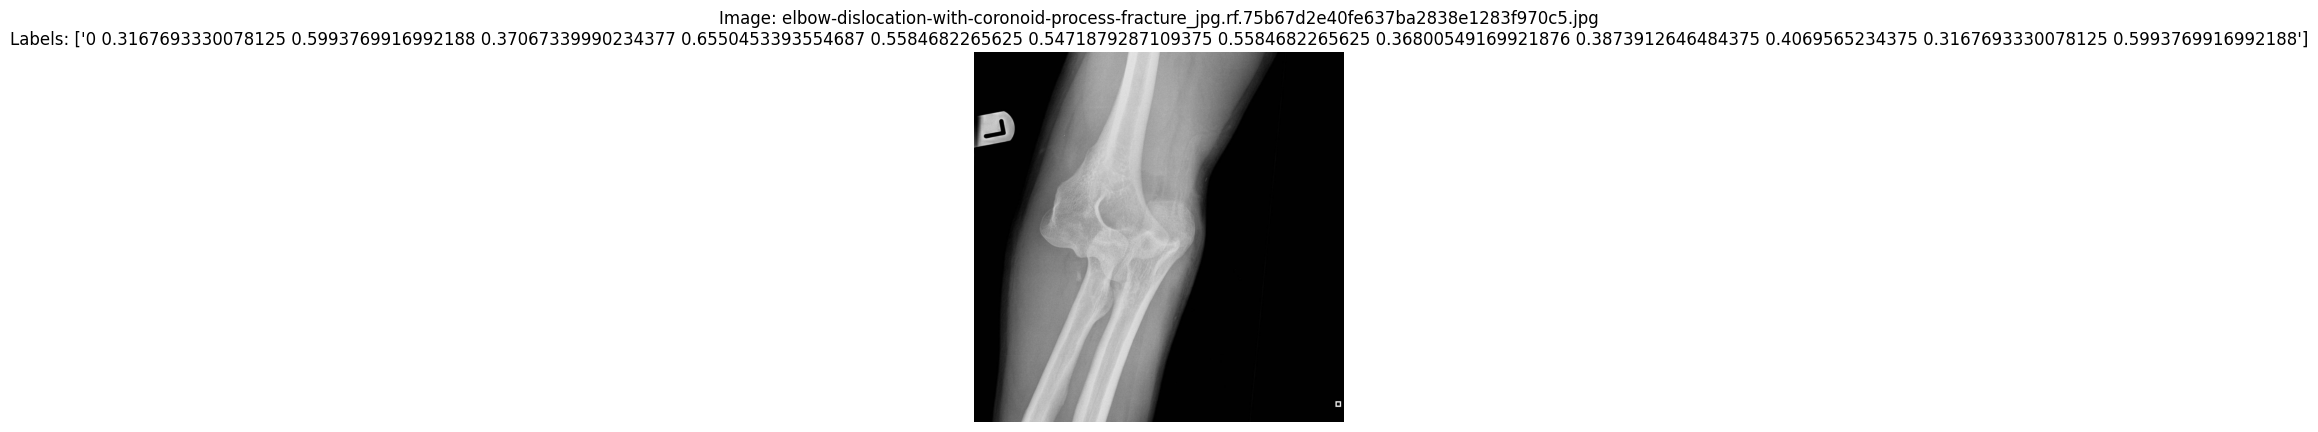

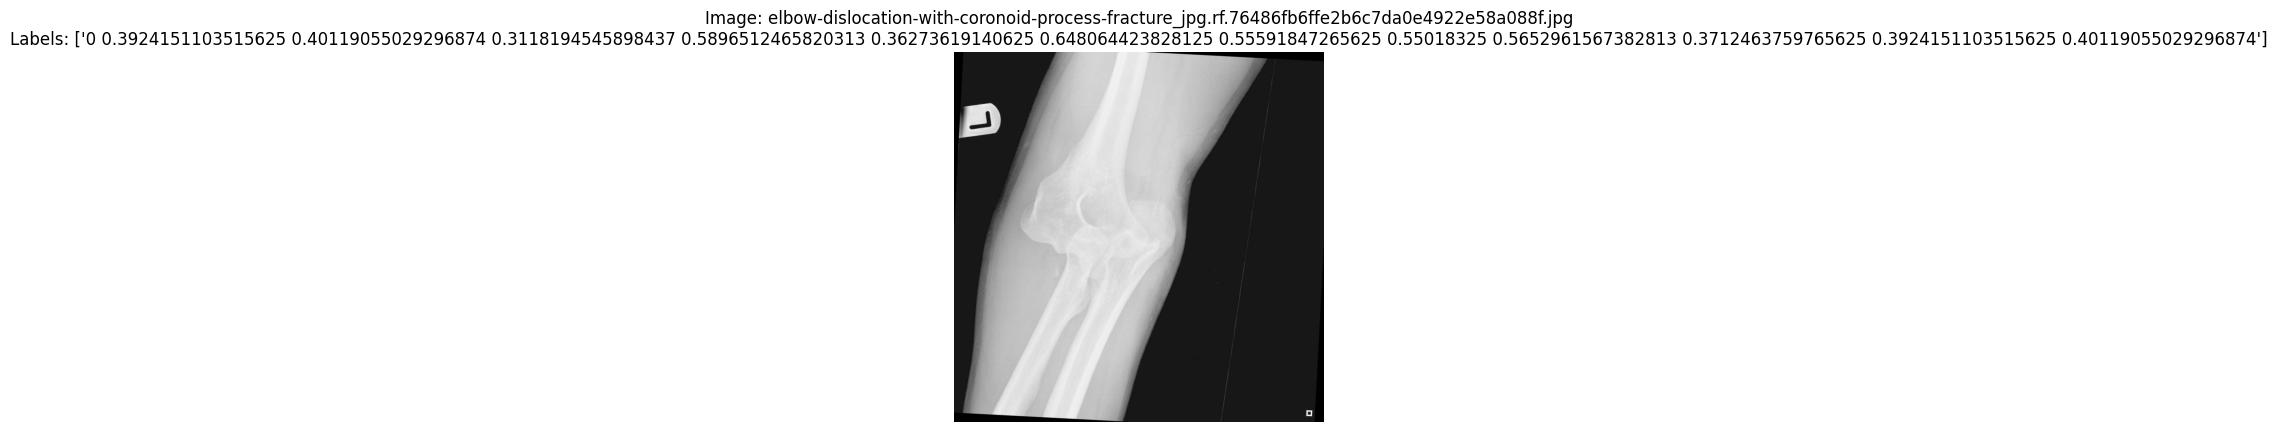

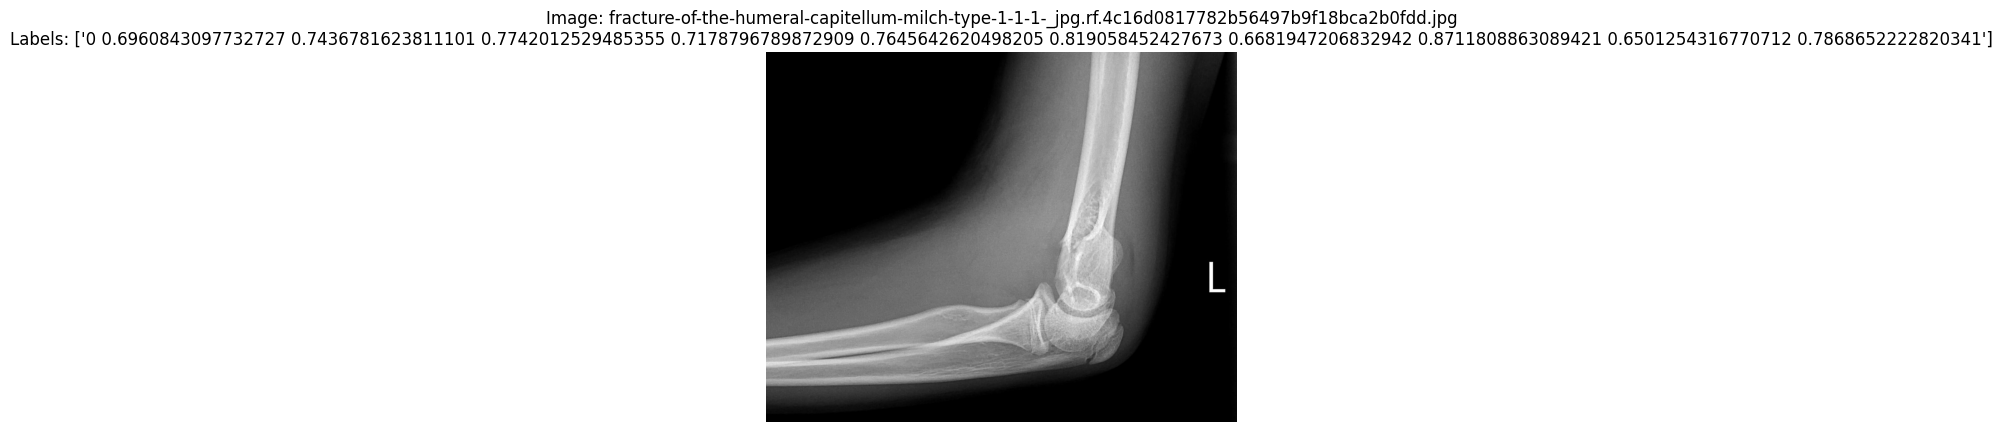

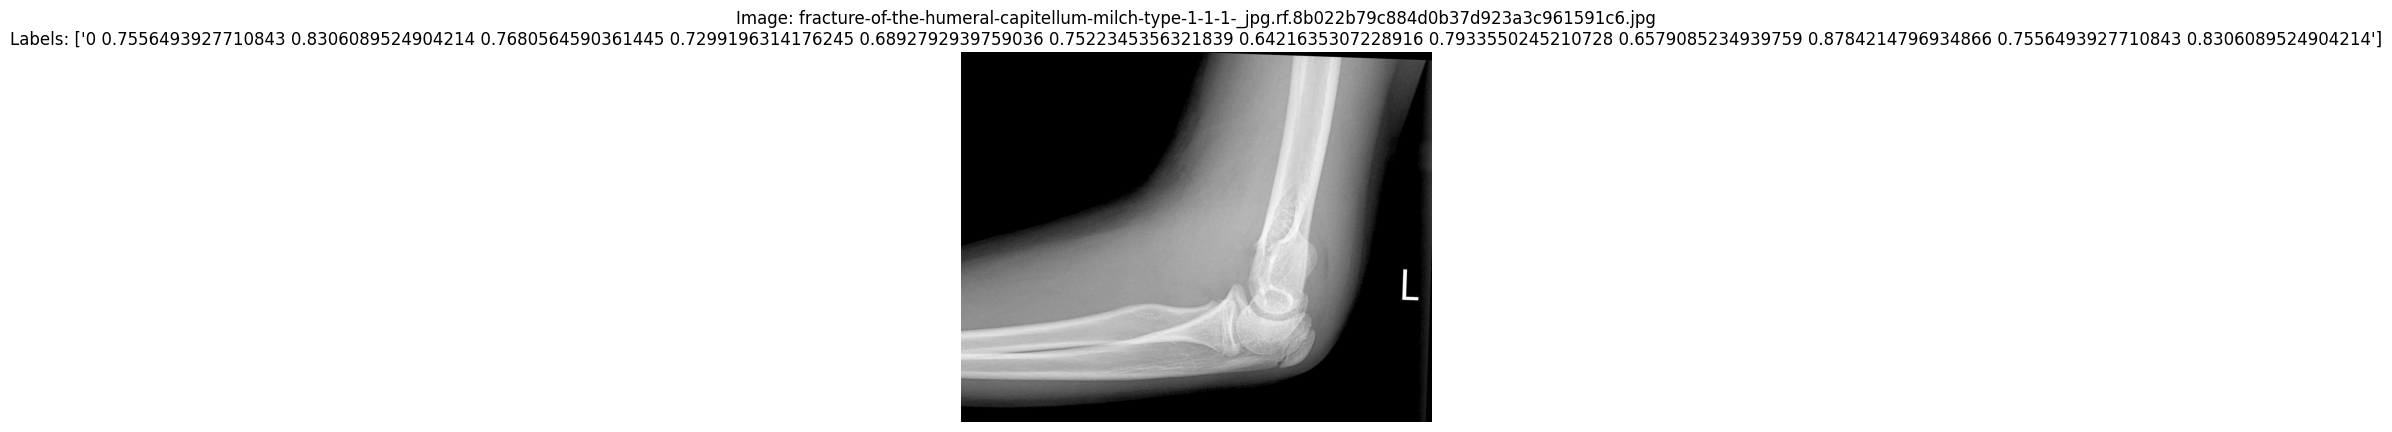

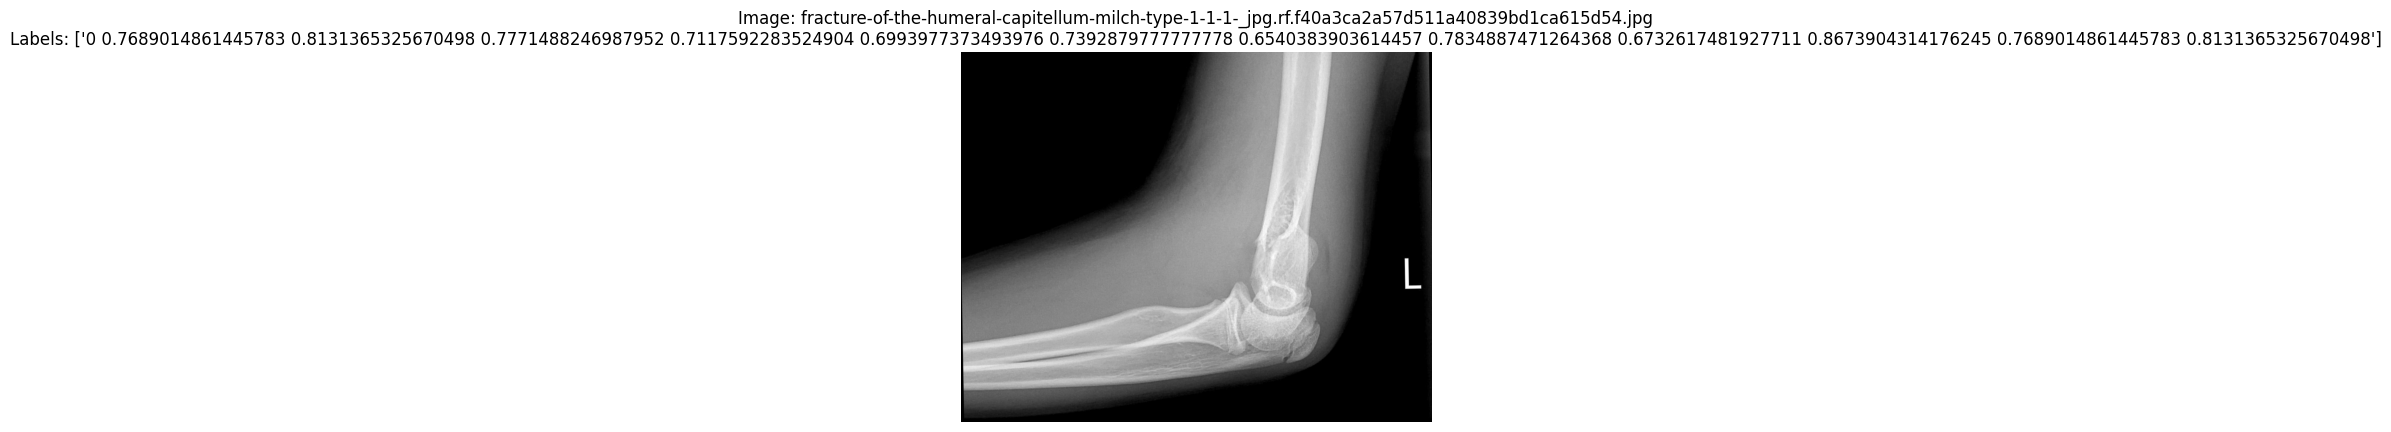

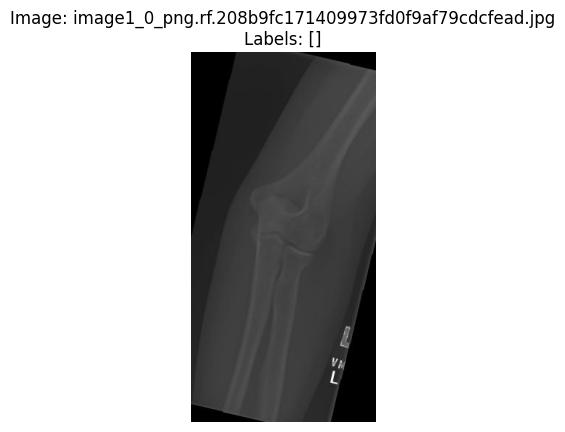

In [13]:
import matplotlib.pyplot as plt

def visualize_data(dataset, class_names=None):
    for i, (image_path, image, labels) in enumerate(dataset[:10]):  # Visualize first 5 samples
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {os.path.basename(image_path)}\nLabels: {labels}")
        plt.axis("off")
        plt.show()

print("Visualizing Training Dataset:")
visualize_data(train_dataset)


In [14]:
import cv2
import os

def resize_images_in_folder(input_folder, output_folder, width, height):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
        
            image = cv2.imread(input_path)
            
            if image is None:
                print(f"Warning: Unable to read image {filename}. Skipping...")
            
            resized_image = cv2.resize(image, (width, height))
            
            # Save the resized image
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, resized_image)
            print(f"Resized image saved: {output_path}")
input_folder = "C:\Users\yamun\OneDrive\Desktop\AIML\archive\BoneFractureYolo8\train\images"  
output_folder = "C:\Users\yamun\OneDrive\Desktop\AIML\archive\BoneFractureYolo8\output"  
new_width = 416  
new_height = 416  

resize_images_in_folder(input_folder, output_folder, new_width, new_height)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3514107329.py, line 23)